
# Linear Regression - Bike Sharing Demand

## Agenda

1. Introducing the bikeshare dataset
    - Reading in the data
    - Visualizing the data
2. Linear regression basics
    - Form of linear regression
    - Building a linear regression model
    - Using the model for prediction
    - Does the scale of the features matter?
3. Working with multiple features
    - Visualizing the more features of data 
    - Adding more features to the model
4. Choosing between models
    - Feature selection
    - Evaluation metrics for regression problems
    - Comparing models with train/test split and RMSE
    - Comparing testing RMSE with null RMSE
5. Creating features
    - Handling categorical features
    - Feature engineering
6. Advantages/Disadvantages of Linear Regression Model

<h1>Bike Sharing Demand</h1>

<h2>Forecast use of a city bikeshare system</h2>
<p/>
You are provided hourly rental data spanning two years. You must <b>predict the <u>total count of bikes rented</u> during each hour</b> covered by the test set, using only information available prior to the rental period.
<p/>
<b>Data Fields</b>
<br/>
datetime - hourly date + timestamp<br/>
season -  1 = spring, 2 = summer, 3 = fall, 4 = winter <br/>
holiday - whether the day is considered a holiday<br/>
workingday - whether the day is neither a weekend nor holiday<br/>
weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog <br/>
temp - temperature in Celsius<br/>
atemp - "feels like" temperature in Celsius<br/>
humidity - relative humidity<br/>
windspeed - wind speed<br/>
casual - number of non-registered user rentals initiated<br/>
registered - number of registered user rentals initiated<br/>
count - number of total rentals<br/>

## Reading in the data

We'll be working with a dataset from Capital Bikeshare that was used in a Kaggle competition ([data dictionary](https://www.kaggle.com/c/bike-sharing-demand/data)).

In [1]:
# read the data and set the datetime as the index
import pandas as pd
url = 'https://raw.githubusercontent.com/upxacademy/ML_with_Python/master/Datasets/bikeshare.csv?token=AYxzdiGnjM610dBT7PuwUnUNOmm3bGcvks5ZFDyLwA%3D%3D'
bikes = pd.read_csv(url, index_col='datetime', parse_dates=True)

In [8]:
len(bikes)

10886

There are 10886 rows in the given data set

In [9]:
bikes.head(15)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8



**Observations:**

- Each sample(row) tells us, number of bikes rented for that hour given the temperature,humidity,windspeed and other features at  that hour.
- 'Count' - this is response variable which tells the number of bikes rented for that hour.
- Total 11 number of features (season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered) including date&hour which is also index.
- There are categorial variables and numeric variables in these features which are to be handled on a certain basis. Firstly lets rename the response variable from 'COUNT' to 'TOTAL' as there is method called 'count' in python.

In [10]:
# "count" is a method, so it's best to name that column something else
bikes.rename(columns={'count':'total'}, inplace=True)

In [12]:
# Placeholder for any queries
#bikes.dtypes
bikes.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [14]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 11 columns):
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
total         10886 non-null int64
dtypes: float64(3), int64(8)
memory usage: 1020.6 KB


Oh, my godness. Luckily there are no null values in the given dataset. So we can proceed with building and visualizing the model.

## Visualizing the data

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

Lets build the regression model from scratch taking temp as first input feature

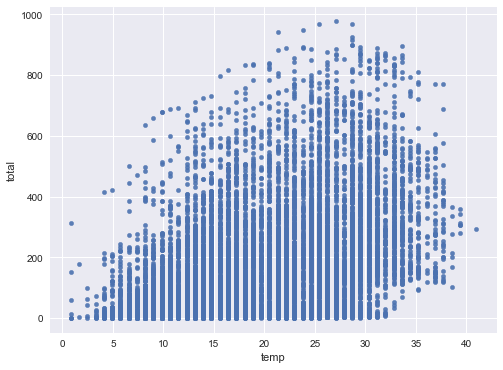

In [17]:
# Pandas scatter plot
bikes.plot(kind='scatter', x='temp', y='total', alpha=0.9)

C:\Users\manjunath\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


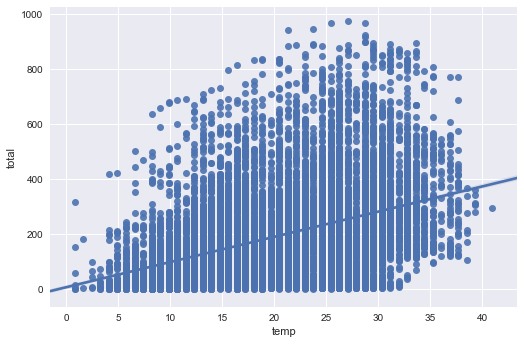

In [20]:
# Seaborn scatter plot with regression line
sns.lmplot(x='temp', y='total', data=bikes, aspect=1.5, scatter_kws={'alpha':0.9})

## Form of linear regression

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

- $y$ is the response
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for $x_1$ (the first feature)
- $\beta_n$ is the coefficient for $x_n$ (the nth feature)

The $\beta$ values are called the **model coefficients**:

- These values are estimated (or "learned") during the model fitting process using the **least squares criterion**.
- Specifically, we are going to find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors").
- And once we've learned these coefficients, we can use the model to predict the response.

<img src="https://raw.githubusercontent.com/upxacademy/ML_with_Python/master/images/estimating_coefficients.png?token=AH0Y7JmsKZPG913jPp4rVGpOba5gxbonks5ZFEq7wA%3D%3D"></img>

In the diagram above:

- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the vertical distances between the observed values and the least squares line.

## Building a linear regression model

Refer : http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [23]:
# create X and y
feature_cols = ['temp']
X = bikes[feature_cols]
y = bikes.total

In [24]:
# import, instantiate, fit
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
# print the coefficients
print (linreg.intercept_)
print (linreg.coef_)

6.046212959617776
[9.17054048]


Interpreting the **intercept** ($\beta_0$):

- It is the value of $y$ when $x$=0.
- Thus, it is the estimated number of rentals when the temperature is 0 degrees Celsius.
- **Note:** It does not always make sense to interpret the intercept. Because at zero temp numbers of bikes rented for sure are $\beta_0$ according to equation, but nothing can be sure in this world.

Interpreting the **"temp" coefficient** ($\beta_1$):

- It is the change in $y$ divided by change in $x$, or the "slope".
- Thus, a temperature increase of 1 degree Celsius is **associated with** a rental increase of 9.17 bikes.
- This is not a statement of causation.
- $\beta_1$ would be **negative** if an increase in temperature was associated with a **decrease** in rentals.

## Using the model for prediction

How many bike rentals would we predict if the temperature was 25 degrees Celsius?

Let us find out with the help of equation that formed on coefficients we got from building the model

In [27]:
# manually calculate the prediction
linreg.intercept_ + linreg.coef_*25

array([235.309725])

In [28]:
# use the predict method
linreg.predict(25)

array([235.309725])

## Does the scale of the features matter?

Let's say that temperature was measured in Fahrenheit, rather than Celsius. How would that affect the model?

In [29]:
# create a new column for Fahrenheit temperature
bikes['temp_F'] = bikes.temp * 1.8 + 32
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,temp_F
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,49.712
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,48.236
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,48.236
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,49.712
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,49.712


C:\Users\manjunath\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


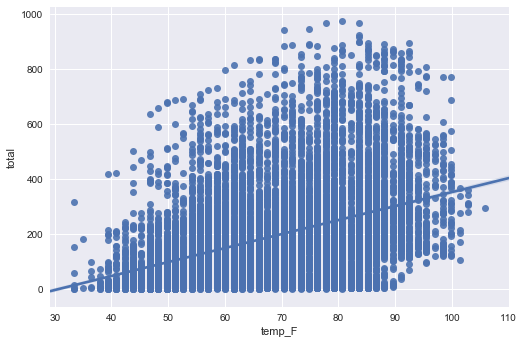

In [31]:
# Seaborn scatter plot with regression line
sns.lmplot(x='temp_F', y='total', data=bikes, aspect=1.5, scatter_kws={'alpha':0.9})

In [32]:
# create X and y
feature_cols = ['temp_F']
X = bikes[feature_cols]
y = bikes.total

# instantiate and fit
linreg = LinearRegression()
linreg.fit(X, y)

# print the coefficients
print (linreg.intercept_)
print (linreg.coef_)

-156.98561782129423
[5.09474471]


In [33]:
# convert 25 degrees Celsius to Fahrenheit
25 * 1.8 + 32

77.0

In [34]:
# predict rentals for 77 degrees Fahrenheit
linreg.predict(77)

array([235.309725])

**Conclusion:** The scale of the features is **irrelevant** for linear regression models. When changing the scale, we simply change our **interpretation** of the coefficients.

Lets drop the temp_F column as we came to find that scale doesn't matter in the linear regression model.

In [35]:
# remove the temp_F column
bikes.drop('temp_F', axis=1, inplace=True)

## Visualizing the more features of data 

In [36]:
# explore more features
feature_cols = ['temp', 'season', 'weather', 'humidity']
feature_cols

['temp', 'season', 'weather', 'humidity']

C:\Users\manjunath\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


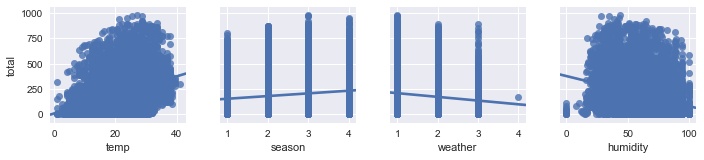

In [37]:
# multiple scatter plots in Seaborn
sns.pairplot(bikes, x_vars=feature_cols, y_vars='total', kind='reg')

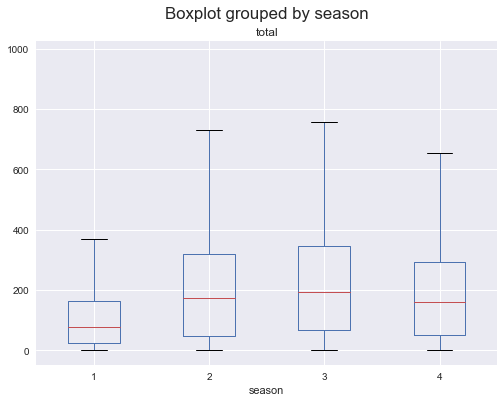

In [40]:
# box plot of rentals, grouped by season
bikes.boxplot(column='total', by='season')

Notably:

- A line can't capture a non-linear relationship.
- There are more rentals in winter than in spring (?)

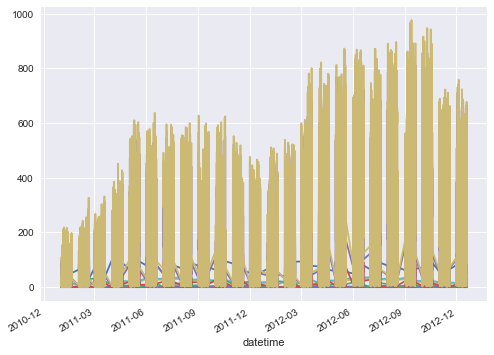

In [42]:
# line plot of rentals
bikes.plot(legend=None)

What does this tell us?

There are more rentals in the winter than the spring, but only because the system is experiencing **overall growth** and the winter months happen to come after the spring months.

## Adding more features to the model

In [43]:
# create a list of features
feature_cols = ['temp', 'season', 'weather', 'humidity']


In [44]:
# create X and y
X = bikes[feature_cols]
y = bikes.total

# instantiate and fit
linreg = LinearRegression()
linreg.fit(X, y)

# print the coefficients
print (linreg.intercept_)
print (linreg.coef_)

159.52068786129942
[ 7.86482499 22.53875753  6.67030204 -3.11887338]


In [45]:
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('temp', 7.8648249924774065),
 ('season', 22.538757532466636),
 ('weather', 6.670302035923836),
 ('humidity', -3.118873382396508)]

Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **temperature** is associated with a **rental increase of 7.86 bikes**.
- Holding all other features fixed, a 1 unit increase in **season** is associated with a **rental increase of 22.5 bikes**.
- Holding all other features fixed, a 1 unit increase in **weather** is associated with a **rental increase of 6.67 bikes**.
- Holding all other features fixed, a 1 unit increase in **humidity** is associated with a **rental decrease of 3.12 bikes**.

Does anything look incorrect?

- the season and weather are not measured numerically, we need to change them to categorial variable with placing dummy values in those column. This is dealt in 'Handling Categorial Features' topic.

## Feature selection

How do we choose which features to include in the model? We're going to use **train/test split** (and eventually **cross-validation**).

Why not use of **p-values** or **R-squared** for feature selection?

- Linear models rely upon **a lot of assumptions** (such as the features being independent), and if those assumptions are violated, p-values and R-squared are less reliable. Train/test split relies on fewer assumptions.
- Features that are unrelated to the response can still have **significant p-values**.
- Adding features to your model that are unrelated to the response will always **increase the R-squared value**, and adjusted R-squared does not sufficiently account for this.
- p-values and R-squared are **proxies** for our goal of generalization, whereas train/test split and cross-validation attempt to **directly estimate** how well the model will generalize to out-of-sample data.


## Evaluation metrics for regression problems

Evaluation metrics for classification problems, such as **accuracy**, are not useful for regression problems. We need evaluation metrics designed for comparing **continuous values**.

Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [46]:
# example true and predicted response values
true = [10, 7, 5, 5]
pred = [8, 6, 5, 10]

In [47]:
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print ('MAE:', metrics.mean_absolute_error(true, pred))
print ('MSE:', metrics.mean_squared_error(true, pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(true, pred)))

MAE: 2.0
MSE: 7.5
RMSE: 2.7386127875258306


Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

Here's an additional example, to demonstrate how MSE/RMSE punish larger errors:

In [48]:
# same true values as above
true = [10, 7, 5, 5]

# new set of predicted values
pred = [10, 7, 5, 13]

# MAE is the same as before
print ('MAE:', metrics.mean_absolute_error(true, pred))

# MSE and RMSE are larger than before
print ('MSE:', metrics.mean_squared_error(true, pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(true, pred)))

MAE: 2.0
MSE: 16.0
RMSE: 4.0


## Comparing models with train/test split and RMSE

In [50]:
#from sklearn.model_selection import train_test_split
#from sklearn import train_test_split
from sklearn.cross_validation import train_test_split

# define a function that accepts a list of features and returns testing RMSE
def train_test_rmse(feature_cols):
    X = bikes[feature_cols]
    y = bikes.total
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [51]:
# compare different sets of features
print (train_test_rmse(['temp', 'season', 'weather', 'humidity']))
print (train_test_rmse(['temp', 'season', 'weather']))
print (train_test_rmse(['temp', 'season', 'humidity']))

154.2063861546127
163.59446901437366
154.31065137688287


In [53]:
# using these as features is not allowed!
print (train_test_rmse(['casual', 'registered']))

3.906588181371489e-13


This is because 'casual' and 'registered' are directly gives us the 'total' number of bikes shared and it will lead to overfitting.

## Comparing testing RMSE with null RMSE

Null RMSE is the RMSE that could be achieved by **always predicting the mean response value**. It is a benchmark against which you may want to measure your regression model.

In [54]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

# create a NumPy array with the same shape as y_test
y_null = np.zeros_like(y_test, dtype=float)

# fill the array with the mean value of y_test
y_null.fill(y_test.mean())
y_null

array([192.26451139, 192.26451139, 192.26451139, ..., 192.26451139,
       192.26451139, 192.26451139])

In [55]:
# compute null RMSE
np.sqrt(metrics.mean_squared_error(y_test, y_null))

179.57906896465727

## Handling categorical features

scikit-learn expects all features to be numeric. So how do we include a categorical feature in our model?

- **Ordered categories:** transform them to sensible numeric values (example: small=1, medium=2, large=3)
- **Unordered categories:** use dummy encoding (0/1)

What are the categorical features in our dataset?

- **Ordered categories:** weather (already encoded with sensible numeric values)
- **Unordered categories:** season (needs dummy encoding), holiday (already dummy encoded), workingday (already dummy encoded)

For season, we can't simply leave the encoding as 1 = spring, 2 = summer, 3 = fall, and 4 = winter, because that would imply an **ordered relationship**. Instead, we create **multiple dummy variables:**

In [56]:
# create dummy variables
season_dummies = pd.get_dummies(bikes.season, prefix='season')

# print 5 random rows
#season_dummies.sample(n=5, random_state=1)
season_dummies.head()

,season_1,season_2,season_3,season_4
datetime,,,,
2011-01-01 00:00:00,1,0,0,0
2011-01-01 01:00:00,1,0,0,0
2011-01-01 02:00:00,1,0,0,0
2011-01-01 03:00:00,1,0,0,0
2011-01-01 04:00:00,1,0,0,0


However, we actually only need **three dummy variables (not four)**, and thus we'll drop the first dummy variable.

Why? Because three dummies captures all of the "information" about the season feature, and implicitly defines spring (season 1) as the **baseline level:**

In [57]:
# drop the first column
season_dummies.drop(season_dummies.columns[0], axis=1, inplace=True)

# print 5 random rows
#season_dummies.sample(n=5, random_state=1)
season_dummies.head()

,season_2,season_3,season_4
datetime,,,
2011-01-01 00:00:00,0,0,0
2011-01-01 01:00:00,0,0,0
2011-01-01 02:00:00,0,0,0
2011-01-01 03:00:00,0,0,0
2011-01-01 04:00:00,0,0,0


In general, if you have a categorical feature with **k possible values**, you create **k-1 dummy variables**.

If that's confusing, think about why we only need one dummy variable for holiday, not two dummy variables (holiday_yes and holiday_no).

In [58]:
# concatenate the original DataFrame and the dummy DataFrame (axis=0 means rows, axis=1 means columns)
bikes = pd.concat([bikes, season_dummies], axis=1)

# print 5 random rows
bikes.sample(n=5, random_state=1)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,season_2,season_3,season_4
datetime,,,,,,,,,,,,,,
2011-09-05 11:00:00,3,1,0,2,28.70,33.335,74,11.0014,101,207,308,0,1,0
2012-03-18 04:00:00,1,0,0,2,17.22,21.210,94,11.0014,6,8,14,0,0,0
2012-10-14 17:00:00,4,0,0,1,26.24,31.060,44,12.9980,193,346,539,0,0,1
2011-04-04 15:00:00,2,0,1,1,31.16,33.335,23,36.9974,47,96,143,1,0,0
2012-12-11 02:00:00,4,0,1,2,16.40,20.455,66,22.0028,0,1,1,0,0,1


In [59]:
# include dummy variables for season in the model
feature_cols = ['temp', 'season_2', 'season_3', 'season_4', 'humidity']
X = bikes[feature_cols]
y = bikes.total
linreg = LinearRegression()
linreg.fit(X, y)
list(zip(feature_cols, linreg.coef_))

[('temp', 11.186405863575752),
 ('season_2', -3.3905430997189026),
 ('season_3', -41.73686071317162),
 ('season_4', 64.41596146824186),
 ('humidity', -2.8194816362596438)]

How do we interpret the season coefficients? They are **measured against the baseline (spring)**:

- Holding all other features fixed, **summer** is associated with a **rental decrease of 3.39 bikes** compared to the spring.
- Holding all other features fixed, **fall** is associated with a **rental decrease of 41.7 bikes** compared to the spring.
- Holding all other features fixed, **winter** is associated with a **rental increase of 64.4 bikes** compared to the spring.

Would it matter if we changed which season was defined as the baseline?

- No, it would simply change our **interpretation** of the coefficients.

**Important:** Dummy encoding is relevant for all machine learning models, not just linear regression models.

In [60]:
# compare original season variable with dummy variables
print (train_test_rmse(['temp', 'season', 'humidity']))
print (train_test_rmse(['temp', 'season_2', 'season_3', 'season_4', 'humidity']))

154.31065137688287
153.37143791835987


## Feature engineering

See if you can create the following features:

- **hour:** as a single numeric feature (0 through 23)
- **hour:** as a categorical feature (use 23 dummy variables)
- **daytime:** as a single categorical feature (daytime=1 from 7am to 8pm, and daytime=0 otherwise)

Then, try using each of the three features (on its own) with `train_test_rmse` to see which one performs the best!

In [61]:
# hour as a numeric feature
bikes['hour'] = bikes.index.hour

In [64]:
bikes.head(25)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,...,0,0,0,0,0,0,0,0,0,0


Since Hour is categorial varible lets build dummies for this 'hour' column

In [65]:
# hour as a categorical feature
hour_dummies = pd.get_dummies(bikes.hour, prefix='hour')
hour_dummies.drop(hour_dummies.columns[0], axis=1, inplace=True)
bikes = pd.concat([bikes, hour_dummies], axis=1)
bikes.head(20)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,...,0,0,0,0,0,0,0,0,0,0


We have to remember that a good model require a good feed i.e, the model need to be trained on the feature and scenarios which are impacting the results. So on this note, we are building the features based on which features we think are impacting the results ( no. of bikes rented at that particular time )

In [67]:
# daytime as a categorical feature
bikes['daytime'] = ((bikes.hour > 6) & (bikes.hour < 21)).astype(int)

We created feature called 'daytime' and include it in building the model, as bikes will be rented more in daytime compared to night because in night everybody will be sleeping and temperature also will be low.

In [71]:
print (train_test_rmse(['hour']))
print (train_test_rmse(bikes.columns[bikes.columns.str.startswith('hour_')]))
print (train_test_rmse(['daytime']))

165.55498413531112
124.18775953335414
144.84022834085818


The RMSE value got better with including daytime as a feature, so we can conclude that some hours and days i.e, particular times play the crucial role in predicting the result of number of bikes rented. So lets create more features which will get the better RMSE value.

**Since weekedays are the days most of the people go for working and i'm assuming there is chance that most of them will rent a bike to office i'm creating the feature called 'weekday'**

In [78]:
# lets take the weekend as feature as a day must be weekday if it is not a weekend.
#mon -0, tue-1, wed-2, thu-3, fri-4, sat-5, sun-6
# Here i'm considering friday, saturday and sunday as weekends.
bikes['weekend'] = ((bikes.index.dayofweek >3) & (bikes.index.dayofweek < 7)).astype(int)

In [80]:
bikes.head(100)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,...,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,daytime,weekend
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,...,0,0,0,0,0,0,0,0,0,1
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,...,0,0,0,0,0,0,0,0,0,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,...,0,0,0,0,0,0,0,0,0,1
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,...,0,0,0,0,0,0,0,0,0,1
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,...,0,0,0,0,0,0,0,0,0,1
2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,...,0,0,0,0,0,0,0,0,0,1
2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,...,0,0,0,0,0,0,0,0,0,1
2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,...,0,0,0,0,0,0,0,0,1,1
2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,...,0,0,0,0,0,0,0,0,1,1


In [81]:
# now lets try finding RMSE using the weekend variable
print(train_test_rmse(['weekend']))

180.45188694406608


RMSE increases with adding weekend attribute. But still lets will check if adding it with other effecting columns make any difference.

In [82]:
hourlist = bikes.columns[bikes.columns.str.startswith('hour_')].tolist()
feature_co = ['weekend']
hourlist+feature_co
print(train_test_rmse(hourlist+feature_co))

124.14354655839476


No huge difference. So we can remove it from the table

In [84]:
bikes.drop(['weekend'], axis=1, inplace=True)

In [85]:
# lets creae three parts of the day and see if they can help for better result.
bikes['morning'] = ((bikes.hour > 4) & (bikes.hour < 11)).astype(int)
bikes['afternoon'] = ((bikes.hour > 10) & (bikes.hour < 16)).astype(int)
bikes['evening'] = ((bikes.hour > 15) & (bikes.hour < 21)).astype(int)
#bikes

In [88]:
# lets see if three parts of the days RMSE value
print(train_test_rmse(['morning', 'afternoon', 'evening']))

145.0045583490032


I think as we already analysed by using hour of the day and it is more microscopic than three parts of the day. This is redundant and we can ignore this three parts of the features also

In [89]:
bikes.drop(['morning','afternoon','evening'], axis = 1, inplace=True)

Lets combine the day and particular hour and create a helpful feature. For example in commute hour people usually rent bikes in busy days. So creating the feature which says if it is commuting hour or not

In [91]:
bikes['commute'] = (((bikes.hour > 6)&(bikes.hour < 9)&(bikes.workingday ==1))|
                    ((bikes.hour > 16)&(bikes.hour < 19)&(bikes.workingday ==1 ))).astype(int)

Also creating a feature for hour if it is in recreational time or not. (People use to do cycling as a recreational activity)

In [93]:
bikes['heve'] = (((bikes.holiday == 1)| (bikes.workingday == 0))& ((bikes.hour > 9) & (bikes.hour < 19))).astype(int)

### Now calculate the RMSE value after adding these new features

In [96]:
hourlist = bikes.columns[bikes.columns.str.startswith('hour_')].tolist()
feature_co = ['temp','season_2','season_3','season_4','humidity','holiday','weather','commute','heve']
hourlist+feature_co
print(train_test_rmse(hourlist+feature_co))

90.05218480486269


## **Here We can see there is significant change in the RMSE value after considering certain changes and adding new features based on the domain knowledge. RMSE value is improved and also accuracy in predicting the total number of bikes rented for an hour is increased.**

### Advantages and Disdvantages of Linear Regression Model

Advantages of linear regression:

- Simple to explain
- Highly interpretable
- Model training and prediction are fast
- No tuning is required (excluding regularization)
- Features don't need scaling
- Can perform well with a small number of observations
- Well-understood

Disadvantages of linear regression:

- Presumes a linear relationship between the features and the response
- Performance is (generally) not competitive with the best supervised learning methods due to high bias
- Can't automatically learn feature interactions